<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/warfare/blob/main/Analysis_of_the_Russo_Ukrainian_War.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [2]:
df1= pd.read_csv('/content/drive/MyDrive/warfare/russia_losses_equipment.csv')
df2= pd.read_csv('/content/drive/MyDrive/warfare/russia_losses_personnel.csv')
df3= pd.read_csv('/content/drive/MyDrive/warfare/russia_losses_equipment_correction.csv')
df1

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2024-08-11,900,366,328,8447,16363,16663,1143,NaN,NaN,13399,28,918,2800.0,NaN,NaN,22524.0,2425.0,1.0
1,2024-08-10,899,366,327,8441,16350,16605,1143,NaN,NaN,13372,28,918,2789.0,NaN,NaN,22453.0,2425.0,1.0
2,2024-08-09,898,366,327,8434,16341,16536,1142,NaN,NaN,13325,28,916,2769.0,NaN,NaN,22371.0,2424.0,1.0
3,2024-08-08,897,366,327,8431,16332,16487,1142,NaN,NaN,13293,28,914,2767.0,NaN,NaN,22285.0,2424.0,1.0
4,2024-08-07,896,365,326,8429,16323,16451,1138,NaN,NaN,13212,28,910,2759.0,NaN,NaN,22226.0,2421.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN,NaN
895,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN,NaN
896,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
897,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       899 non-null    object 
 1   day                        899 non-null    int64  
 2   aircraft                   899 non-null    int64  
 3   helicopter                 899 non-null    int64  
 4   tank                       899 non-null    int64  
 5   APC                        899 non-null    int64  
 6   field artillery            899 non-null    int64  
 7   MRL                        899 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      899 non-null    int64  
 11  naval ship                 899 non-null    int64  
 12  anti-aircraft warfare      899 non-null    int64  
 13  special equipment          880 non-null    float64

In [4]:
df1.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,submarines
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,65.000000,65.000000,899.000000,899.000000,899.000000,880.000000,36.000000,834.000000,834.000000,333.0
mean,451.000000,287.361513,270.884316,4121.962180,8077.830923,5212.823137,617.189099,1047.507692,69.323077,4147.896552,18.548387,400.751947,791.315909,3.944444,8486.225420,1172.230216,1.0
std,259.663243,66.015550,66.870749,2229.886181,4054.419928,4582.020743,327.078435,466.162060,7.545917,3618.439440,5.756825,265.167950,788.370720,0.333333,5375.833772,729.115340,0.0
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000,1.0
25%,226.500000,266.000000,233.500000,2469.000000,5102.000000,1457.000000,344.500000,600.000000,60.000000,1073.000000,15.000000,178.500000,147.750000,4.000000,4404.500000,531.000000,1.0
50%,451.000000,308.000000,294.000000,3781.000000,7382.000000,3229.000000,564.000000,1178.000000,73.000000,2801.000000,18.000000,325.000000,453.500000,4.000000,6672.500000,1214.000000,1.0
75%,675.500000,329.000000,324.000000,5973.000000,11061.500000,8449.000000,941.000000,1437.000000,76.000000,6572.500000,23.000000,622.000000,1306.250000,4.000000,11722.750000,1815.750000,1.0
max,900.000000,366.000000,328.000000,8447.000000,16363.000000,16663.000000,1143.000000,1701.000000,76.000000,13399.000000,28.000000,918.000000,2800.000000,4.000000,22524.000000,2425.000000,1.0


In [5]:
# Fill null values in 'fuel tank' and 'military auto' with 0 to avoid issues in the sum.
df1['fuel tank'].fillna(0, inplace=True)
df1['military auto'].fillna(0, inplace=True)
df1['mobile SRBM system'].fillna(0, inplace=True)

# Sum the values of 'fuel tank' and 'military auto' into 'fuel tank and military auto'.
df1['vehicles and fuel tanks'] = df1['vehicles and fuel tanks'].fillna(0) + df1['fuel tank'] + df1['military auto']
df1['cruise missiles'] = df1['cruise missiles'].fillna(0) + df1['mobile SRBM system']

# Remove the columns 'fuel tank' and 'military auto'.
df1.drop(columns=['fuel tank', 'military auto','mobile SRBM system'], inplace=True)
df1

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2024-08-11,900,366,328,8447,16363,16663,1143,13399,28,918,2800.0,NaN,22524.0,2425.0,1.0
1,2024-08-10,899,366,327,8441,16350,16605,1143,13372,28,918,2789.0,NaN,22453.0,2425.0,1.0
2,2024-08-09,898,366,327,8434,16341,16536,1142,13325,28,916,2769.0,NaN,22371.0,2424.0,1.0
3,2024-08-08,897,366,327,8431,16332,16487,1142,13293,28,914,2767.0,NaN,22285.0,2424.0,1.0
4,2024-08-07,896,365,326,8429,16323,16451,1138,13212,28,910,2759.0,NaN,22226.0,2421.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2022-03-01,6,29,29,198,846,77,24,3,2,7,NaN,NaN,365.0,0.0,NaN
895,2022-02-28,5,29,29,150,816,74,21,3,2,5,NaN,NaN,351.0,0.0,NaN
896,2022-02-27,4,27,26,150,706,50,4,2,2,0,NaN,NaN,190.0,0.0,NaN
897,2022-02-26,3,27,26,146,706,49,4,2,2,0,NaN,NaN,190.0,0.0,NaN


In [6]:
# Before applying corrections.
filtered_row = df1[df1['date'] == '2023-10-03']

filtered_row

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
313,2023-10-03,587,315,316,4732,9008,6565,801,5080,20,540,943.0,NaN,8932.0,1529.0,1.0


In [7]:
# Apply corrections.
for index, row in df3.iterrows():
    """Updates certain columns of df1 using information from df3 based on matching dates."""
    date = row['date']
    mask = df1['date'] == date
    df1.loc[mask, row.index[2:]] += row[2:]

df1

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2024-08-11,900,366,328,8447,16363,16663,1143,13399,28,918,2800.0,NaN,22524.0,2425.0,1.0
1,2024-08-10,899,366,327,8441,16350,16605,1143,13372,28,918,2789.0,NaN,22453.0,2425.0,1.0
2,2024-08-09,898,366,327,8434,16341,16536,1142,13325,28,916,2769.0,NaN,22371.0,2424.0,1.0
3,2024-08-08,897,366,327,8431,16332,16487,1142,13293,28,914,2767.0,NaN,22285.0,2424.0,1.0
4,2024-08-07,896,365,326,8429,16323,16451,1138,13212,28,910,2759.0,NaN,22226.0,2421.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2022-03-01,6,29,29,198,846,77,24,3,2,7,NaN,NaN,365.0,0.0,NaN
895,2022-02-28,5,29,29,150,816,74,21,3,2,5,NaN,NaN,351.0,0.0,NaN
896,2022-02-27,4,27,26,150,706,50,4,2,2,0,NaN,NaN,190.0,0.0,NaN
897,2022-02-26,3,27,26,146,706,49,4,2,2,0,NaN,NaN,190.0,0.0,NaN


In [8]:
# After applying corrections.
filtered_row = df1[df1['date'] == '2023-10-03']

filtered_row

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
313,2023-10-03,587,314,316,4737,9008,6565,801,5079,20,540,943.0,NaN,8932.0,1529.0,1.0


In [9]:
df1.isnull().sum()

,0
date,0
day,0
aircraft,0
helicopter,0
tank,0
APC,0
field artillery,0
MRL,0
drone,0
naval ship,0


In [10]:
df1.fillna(0, inplace=True)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        899 non-null    object 
 1   day         899 non-null    int64  
 2   personnel   899 non-null    int64  
 3   personnel*  899 non-null    object 
 4   POW         62 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 35.2+ KB


In [12]:
df2.describe()

,day,personnel,POW
count,899.000000,899.000000,62.000000
mean,451.000000,225364.288098,386.387097
std,259.663243,170147.702356,131.440363
min,2.000000,2800.000000,0.000000
25%,226.500000,61870.000000,389.000000
50%,451.000000,202430.000000,421.000000
75%,675.500000,358750.000000,474.500000
max,900.000000,590920.000000,496.000000


In [13]:
df2.isnull().sum()

,0
date,0
day,0
personnel,0
personnel*,0
POW,837


In [14]:
df2.fillna(0, inplace=True)

In [15]:
df1.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2024-08-11,900,366,328,8447,16363,16663,1143,13399,28,918,2800.0,0,22524.0,2425.0,1.0
1,2024-08-10,899,366,327,8441,16350,16605,1143,13372,28,918,2789.0,0,22453.0,2425.0,1.0
2,2024-08-09,898,366,327,8434,16341,16536,1142,13325,28,916,2769.0,0,22371.0,2424.0,1.0
3,2024-08-08,897,366,327,8431,16332,16487,1142,13293,28,914,2767.0,0,22285.0,2424.0,1.0
4,2024-08-07,896,365,326,8429,16323,16451,1138,13212,28,910,2759.0,0,22226.0,2421.0,1.0


In [16]:
df1.tail()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
894,2022-03-01,6,29,29,198,846,77,24,3,2,7,0.0,0,365.0,0.0,0.0
895,2022-02-28,5,29,29,150,816,74,21,3,2,5,0.0,0,351.0,0.0,0.0
896,2022-02-27,4,27,26,150,706,50,4,2,2,0,0.0,0,190.0,0.0,0.0
897,2022-02-26,3,27,26,146,706,49,4,2,2,0,0.0,0,190.0,0.0,0.0
898,2022-02-25,2,10,7,80,516,49,4,0,2,0,0.0,0,160.0,0.0,0.0


In [17]:
# Rename columns to make them more clear.
df2.drop(columns=['personnel*'], inplace=True)
df2.rename(columns={'personnel': 'killed in action', 'POW': 'prisoners'}, inplace=True)

In [18]:
df2.head()

,date,day,killed in action,prisoners
0,2024-08-11,900,590920,0.0
1,2024-08-10,899,589700,0.0
2,2024-08-09,898,588540,0.0
3,2024-08-08,897,587510,0.0
4,2024-08-07,896,586370,0.0


In [19]:
df2.tail()

,date,day,killed in action,prisoners
894,2022-03-01,6,5710,200.0
895,2022-02-28,5,5300,0.0
896,2022-02-27,4,4500,0.0
897,2022-02-26,3,4300,0.0
898,2022-02-25,2,2800,0.0


In [20]:
# Combine both dataframes.
df_combo = pd.merge(df1, df2, on=['date', 'day'], how='outer')
df_combo

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines,killed in action,prisoners
0,2024-08-11,900,366,328,8447,16363,16663,1143,13399,28,918,2800.0,0,22524.0,2425.0,1.0,590920,0.0
1,2024-08-10,899,366,327,8441,16350,16605,1143,13372,28,918,2789.0,0,22453.0,2425.0,1.0,589700,0.0
2,2024-08-09,898,366,327,8434,16341,16536,1142,13325,28,916,2769.0,0,22371.0,2424.0,1.0,588540,0.0
3,2024-08-08,897,366,327,8431,16332,16487,1142,13293,28,914,2767.0,0,22285.0,2424.0,1.0,587510,0.0
4,2024-08-07,896,365,326,8429,16323,16451,1138,13212,28,910,2759.0,0,22226.0,2421.0,1.0,586370,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2022-03-01,6,29,29,198,846,77,24,3,2,7,0.0,0,365.0,0.0,0.0,5710,200.0
895,2022-02-28,5,29,29,150,816,74,21,3,2,5,0.0,0,351.0,0.0,0.0,5300,0.0
896,2022-02-27,4,27,26,150,706,50,4,2,2,0,0.0,0,190.0,0.0,0.0,4500,0.0
897,2022-02-26,3,27,26,146,706,49,4,2,2,0,0.0,0,190.0,0.0,0.0,4300,0.0


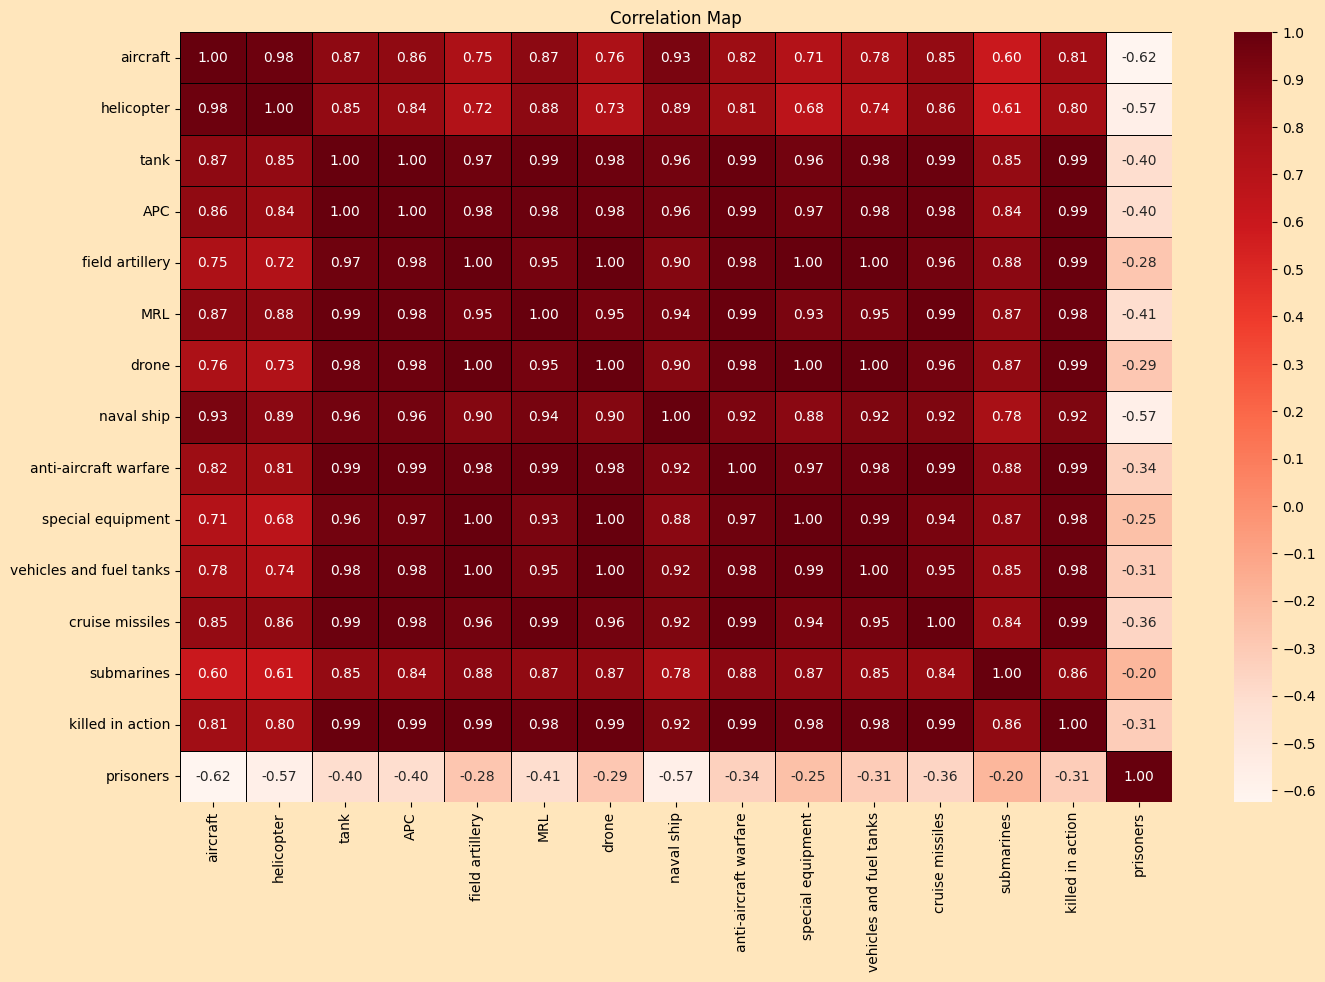

In [21]:
# Create the correlation map.
df1_filtered = df_combo.drop(columns=['date', 'day', 'greatest losses direction'])
nums = df1_filtered.apply(pd.to_numeric, errors='coerce')

correlation_matrix = nums.corr()

fig, ax = plt.subplots(figsize=(16, 10))

fig.patch.set_facecolor((255/255, 230/255, 188/255, 1))
ax.set_facecolor((255/255, 230/255, 188/255, 1))

heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Reds',
    fmt=".2f",
    linewidths=0.7,
    linecolor='black',
    ax=ax,
    cbar_kws={'ticks': [-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
)

plt.title('Correlation Map')
plt.show()

In [22]:
df1['greatest losses direction'].unique()

array([0, 'Lyman, Bakhmut and Avdiivka', 'Lyman and Bakhmut',
       'Bakhmut and Lyman', 'Kupiansk, Avdiivka and Bakhmut',
       'Bakhmut and Avdiivka', 'Bakhmut, Lyman and Avdiivka',
       'Avdiivka, Bakhmut and Lyman', 'Lyman and Avdiivka',
       'Lyman, Avdiivka and Bakhmut', 'Bakhmut', 'Avdiivka and Lyman',
       'Avdiivka and Bakhmut', 'Donetsk and Lyman',
       'Bakhmut and Kramatorsk', 'Kryvyi Rih and Bakhmut',
       'Kramatorsk and Bakhmut', 'Kramatorsk and Kryvyi Rih',
       'Bakhmut, Avdiivka and Kramatorsk', 'Kryvyi Rih and Kramatorsk',
       'Donetsk, Bakhmut and Kramatorsk',
       'Kramatorsk, Avdiivka and Kryvyi Rih', 'Kramatorsk and Donetsk',
       'Donetsk', 'Bakhmut and Donetsk', 'Kryvyi Rih and Mykolaiv',
       'Kharkiv and Donetsk', 'Kryvyi Rih and Donetsk',
       'Donetsk and Kryvyi Rih', 'Donetsk and Kurakhove',
       'Donetsk and Mykolaiv', 'Bakhmut and Kryvyi Rih', 'Kryvyi Rih',
       'Kramatorsk', 'Kramatorsk, Kryvyi Rih and Bakhmut', 'Sloviansk',

In [23]:
# Create new dataframe
directions = pd.DataFrame({
    'places': [
        'bakhmut', 'donetsk', 'kramatorsk', 'avdiivka', 'izyum', 'lyman',
        'kryvyi rih', 'kurakhove', 'zaporizhzhia', 'sloviansk',
        'kharkiv', 'sievierodonetsk', 'mykolaiv', 'popasna', 'novopavlivsk'
    ],
    'frequency': [0] * 15
})

directions

,places,frequency
0,bakhmut,0
1,donetsk,0
2,kramatorsk,0
3,avdiivka,0
4,izyum,0
5,lyman,0
6,kryvyi rih,0
7,kurakhove,0
8,zaporizhzhia,0
9,sloviansk,0


In [24]:
def update_counts(df1, directions):
    """Updates the occurrence count of specific keywords in df1 and records them in the places DataFrame under the 'frequency' column."""
    keywords = directions['places'].tolist()
    for keyword in keywords:
        frequency = df1['greatest losses direction'].str.contains(keyword, case=False, na=False).sum()
        directions.loc[directions['places'] == keyword, 'frequency'] += frequency

update_counts(df1, directions)
directions

,places,frequency
0,bakhmut,83
1,donetsk,69
2,kramatorsk,32
3,avdiivka,33
4,izyum,8
5,lyman,27
6,kryvyi rih,25
7,kurakhove,14
8,zaporizhzhia,10
9,sloviansk,12


In [25]:
!pip install plotly

In [26]:
import plotly.express as px
import plotly.io as pio

# Plotly offline 모드를 설정 (특히 콜랩 환경에서 유용)
pio.renderers.default = 'colab'

In [27]:
# Sort the data by frequency.
places_sorted = directions.sort_values(by='frequency', ascending=False)

# Choose color palette.
color_palette = px.colors.qualitative.T10
color_palette += px.colors.qualitative.Pastel1
color_palette = color_palette[:15]

# Create bar chart.
fig = px.bar(
    places_sorted,
    x='places',
    y='frequency',
    color='places',
    color_discrete_sequence=color_palette,
    labels={'places': 'Places', 'frequency': 'Frequency'},
    height=800
)

# Customize bar chart.
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))

fig.update_layout(
    paper_bgcolor='rgba(255, 230, 188, 1)',
    plot_bgcolor='rgba(255, 230, 188, 1)',
    legend=dict(
        title=dict(
            text='<b>Places</b>',
            font=dict(size=14, color='black')
        ),
        font=dict(size=14, color='black'),
        bgcolor='rgba(255, 230, 188, 1)',
        bordercolor='black',
        borderwidth=2,
        x=1,
        y=1,
        xanchor='left',
        yanchor='top'
    ),

    font=dict(
        color='black',
        family='Arial',
        size=16
    ),
    title=dict(
            text='<b>Greatest Losses Directions</b>',
            x=0.5,
            xanchor='center',
            yanchor='top',
            font=dict(size=24)
        )
)

fig.show()

In [28]:
# Select the first row from the third column onwards.
loc1 = df_combo.iloc[:, 2:]

# Convert all columns to numeric, forcing errors to NaN.
c1 = loc1.apply(pd.to_numeric, errors='coerce')

# Obtain the maximum value of each column.
cumulative_losses1 = c1.max()

# Convert to dataframe and sort it.
cumulative_losses1 = cumulative_losses1.reset_index()

# Rename columns.
cumulative_losses1.columns = ['unit', 'unit_amount']

# Sort columns by their 'unit_amout' values.
cumulative_losses1 = cumulative_losses1.sort_values(by='unit_amount', ascending=False)
cumulative_losses1

,unit,unit_amount
14,killed in action,590920.0
11,vehicles and fuel tanks,22524.0
4,field artillery,16663.0
3,APC,16363.0
6,drone,13399.0
2,tank,8447.0
9,special equipment,2800.0
12,cruise missiles,2425.0
5,MRL,1143.0
8,anti-aircraft warfare,918.0


In [29]:
air_units = ['aircraft', 'helicopter', 'drone', 'cruise missiles']
naval_units = ['naval ship', 'submarines']
land_units = ['tank', 'APC', 'field artillery', 'MRL', 'anti-aircraft warfare', 'special equipment',
               'greatest losses direction', 'vehicles and fuel tanks']
personnel_units = ['killed in action', 'prisoners']
zones = ['greatest losses direction']

# Calculate the total units per category and add new columns.
df_combo['total air units'] = df_combo[air_units].sum(axis=1, numeric_only=True)
df_combo['total ground units'] = df_combo[land_units].sum(axis=1, numeric_only=True)
df_combo['total naval units'] = df_combo[naval_units].sum(axis=1, numeric_only=True)
df_combo['zones'] = df_combo[zones].sum(axis=1, numeric_only=True)
df_combo['total personnel units'] = df_combo[personnel_units].sum(axis=1, numeric_only=True)

In [30]:
def impute_unit(unit_name):
    """
    Classifies unit names into different categories based on predefined lists (air_units, naval_units, personnel_units, zones),
    and then applies this function to the 'unit' column of the DataFrame cumulative_losses1 using the apply method along with a lambda function to create a new column 'unit_type'.
    This new column contains the assigned unit category for each row based on the unit name.
    """
    if unit_name in air_units:
        return 'Air Units'
    elif unit_name in naval_units:
        return 'Naval Units'
    elif unit_name in personnel_units:
        return 'Personnel Units'
    elif unit_name in zones:
        return 'Zones'
    else:
        return 'Land Units'


cumulative_losses1['unit_type'] = cumulative_losses1['unit'].apply(lambda x: impute_unit(x))
cumulative_losses1

,unit,unit_amount,unit_type
14,killed in action,590920.0,Personnel Units
11,vehicles and fuel tanks,22524.0,Land Units
4,field artillery,16663.0,Land Units
3,APC,16363.0,Land Units
6,drone,13399.0,Air Units
2,tank,8447.0,Land Units
9,special equipment,2800.0,Land Units
12,cruise missiles,2425.0,Air Units
5,MRL,1143.0,Land Units
8,anti-aircraft warfare,918.0,Land Units


In [31]:
# Filter data by type of unit.
filtered_cumm_sum_df = cumulative_losses1[cumulative_losses1['unit_type'] != 'Zones']

# Group by 'unit_type' and sum 'unit_amount'.
unit_type_sums = filtered_cumm_sum_df.groupby('unit_type')['unit_amount'].sum().reset_index()

# Create donut chart.
fig = px.pie(
    unit_type_sums,
    names='unit_type',
    values='unit_amount',
    title='<b>Total Losses Distribution</b>',
    labels={'unit_type': 'Unit Type', 'unit_amount': 'Total Amount'},
    hover_data={'unit_amount': True},
    hole=0.4,
    color_discrete_sequence=px.colors.sequential.RdBu,
    height=600
)

# Customize donut chart.
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict( line=dict(color='#000000', width=2)))

fig.update_layout(
    paper_bgcolor='rgba(255, 230, 188, 1)',
    plot_bgcolor='rgba(255,255,255,1)',
    legend=dict(
        title=dict(
            text='<b style="display: block; text-align: center;">Unit Type</b>',
            font=dict(size=14, color='black')
        ),
        font=dict(size=14, color='black'),
        bgcolor='rgba(255, 230, 188, 1)',
        bordercolor='black',
        borderwidth=2,
        x=1,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
)

fig.show()

In [32]:
# Filter data by type of unit.
filtered_data1 = cumulative_losses1[cumulative_losses1['unit_type'] == 'Land Units']

# Create donut chart.
fig = px.pie(filtered_data1, values='unit_amount', names='unit', hole=0.4, title='<b>Distribution of losses in Land Units</b>', color_discrete_sequence=px.colors.qualitative.Dark2_r)

# Customize donut chart.
fig.update_traces(
    hoverinfo='label+percent',
    textfont_size=20,
    marker=dict(line=dict(color='#000000', width=2))
)


fig.update_layout(
paper_bgcolor='rgba(255, 230, 188, 1)',
plot_bgcolor='rgba(255,255,255,1)',
legend=dict(
    title=dict(
        text='<b style="display: block; text-align: center;">Units</b>',
        font=dict(size=14, color='black')
    ),
    font=dict(size=14, color='black'),
    bgcolor='rgba(255, 230, 188, 1)',
    bordercolor='black',
    borderwidth=2,
    x=1,
    y=1,
    xanchor='left',
    yanchor='top'
),
    )

fig.show()

In [33]:
# Filter data by type of unit.
filtered_data = cumulative_losses1[cumulative_losses1['unit_type'] == 'Land Units'].sort_values(by='unit_amount', ascending=False)

# Create bar chart.
fig = px.bar(
    filtered_data,
    x='unit',
    y='unit_amount',
    color='unit',
    labels={'unit': 'Unit', 'unit_amount': 'Unit Amount'},
    height=800,
    color_discrete_sequence=px.colors.qualitative.Dark2_r
)

# Customize bar chart.
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))

fig.update_layout(
    paper_bgcolor='rgba(255, 230, 188, 1)',
    plot_bgcolor='rgba(255, 230, 188, 1)',
    legend=dict(
    title=dict(
        text='<b style="display: block; text-align: center;">Units</b>',
        font=dict(size=14, color='black')
    ),
    font=dict(size=14, color='black'),
    bgcolor='rgba(255, 230, 188, 1)',
    bordercolor='black',
    borderwidth=2,
    x=1,
    y=1,
    xanchor='left',
    yanchor='top'
),
    font=dict(
        color='black',
        family='Arial',
        size=16
    ),
    title=dict(
        text=f'<b>Amount of units losses in Land Units</b>',
        x=0.5,
        xanchor='center',
        yanchor='top',
        font=dict(size=24)
    ),
    margin=dict(t=150)

)


fig.show()

In [34]:
# Filter data by type of unit.
filtered_data1 = cumulative_losses1[cumulative_losses1['unit_type'] == 'Naval Units']

# Create donut chart.
fig = px.pie(filtered_data1, values='unit_amount', names='unit', hole=0.4, title='<b>Distribution of losses in Naval Units</b>', color_discrete_sequence=px.colors.qualitative.Prism_r)

# Customize donut chart.
fig.update_traces(
    hoverinfo='label+percent',
    textfont_size=20,
    marker=dict(line=dict(color='#000000', width=2))
)


fig.update_layout(
paper_bgcolor='rgba(255, 230, 188, 1)',
plot_bgcolor='rgba(255,255,255,1)',
legend=dict(
    title=dict(
        text='<b style="display: block; text-align: center;">Units</b>',
        font=dict(size=14, color='black')
    ),
    font=dict(size=14, color='black'),
    bgcolor='rgba(255, 230, 188, 1)',
    bordercolor='black',
    borderwidth=2,
    x=1,
    y=1,
    xanchor='left',
    yanchor='top'
),
    )


fig.show()

In [35]:
# Filter data by type of unit.
filtered_data = cumulative_losses1[cumulative_losses1['unit_type'] == 'Naval Units'].sort_values(by='unit_amount', ascending=False)

# Create bar chart.
fig = px.bar(
    filtered_data,
    x='unit',
    y='unit_amount',
    color='unit',
    labels={'unit': 'Unit', 'unit_amount': 'Unit Amount'},
    height=800,
    color_discrete_sequence=px.colors.qualitative.Prism_r)

# Customize bar chart.
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))


fig.update_layout(
    paper_bgcolor='rgba(255, 230, 188, 1)',
    plot_bgcolor='rgba(255, 230, 188, 1)',
    legend=dict(
    title=dict(
        text='<b style="display: block; text-align: center;">Units</b>',
        font=dict(size=14, color='black')
    ),
    font=dict(size=14, color='black'),
    bgcolor='rgba(255, 230, 188, 1)',
    bordercolor='black',
    borderwidth=2,
    x=1,
    y=1,
    xanchor='left',
    yanchor='top'
),
    font=dict(
        color='black',
        family='Arial',
        size=16
    ),
    title=dict(
        text=f'<b>Amount of unit losses in Naval Units</b>',
        x=0.5,
        xanchor='center',
        yanchor='top',
        font=dict(size=24)
    ),
    margin=dict(t=150)

)


fig.show()

In [36]:
# Filter data by type of unit.
filtered_data1 = cumulative_losses1[cumulative_losses1['unit_type'] == 'Air Units']

# Customize donut chart.
fig = px.pie(filtered_data1, values='unit_amount', names='unit', hole=0.4, title='<b>Distribution of losses in Air Units</b>', color_discrete_sequence=px.colors.qualitative.T10)

# Customize donut chart.
fig.update_traces(
    hoverinfo='label+percent',
    textfont_size=20,
    marker=dict(line=dict(color='#000000', width=2))
)


fig.update_layout(
paper_bgcolor='rgba(255, 230, 188, 1)',
plot_bgcolor='rgba(255,255,255,1)',
legend=dict(
    title=dict(
        text='<b style="display: block; text-align: center;">Units</b>',
        font=dict(size=14, color='black')
    ),
    font=dict(size=14, color='black'),
    bgcolor='rgba(255, 230, 188, 1)',
    bordercolor='black',
    borderwidth=2,
    x=1,
    y=1,
    xanchor='left',
    yanchor='top'
),
    )

fig.show()

In [37]:
# Filter data by type of unit.
filtered_data = cumulative_losses1[cumulative_losses1['unit_type'] == 'Air Units'].sort_values(by='unit_amount', ascending=False)

# Create bar chart.
fig = px.bar(
    filtered_data,
    x='unit',
    y='unit_amount',
    color='unit',
    labels={'unit': 'Unit', 'unit_amount': 'Unit Amount'},
    height=800,
    color_discrete_sequence=px.colors.qualitative.T10
)

# Customize bar chart.
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))


fig.update_layout(
    paper_bgcolor='rgba(255, 230, 188, 1)',
    plot_bgcolor='rgba(255, 230, 188, 1)',
    legend=dict(
    title=dict(
        text='<b style="display: block; text-align: center;">Units</b>',
        font=dict(size=14, color='black')
    ),
    font=dict(size=14, color='black'),
    bgcolor='rgba(255, 230, 188, 1)',
    bordercolor='black',
    borderwidth=2,
    x=1,
    y=1,
    xanchor='left',
    yanchor='top'
),
    font=dict(
        color='black',
        family='Arial',
        size=16
    ),
    title=dict(
        text=f'<b>Amount of unit losses in Air Units</b>',
        x=0.5,
        xanchor='center',
        yanchor='top',
        font=dict(size=24)
    ),
    margin=dict(t=150)

)

fig.show()

In [38]:
# Filter data.
filtered_data1 = cumulative_losses1[cumulative_losses1['unit_type'] == 'Personnel Units']

# Create donut chart.
fig = px.pie(
    filtered_data1,
    values='unit_amount',
    names='unit',
    hole=0.4,
    title='<b>Distribution of Personnel Units losses</b>',
    color='unit',  # Indicar que queremos colorear por la columna 'unit'
    color_discrete_map={
        'killed in action': '#750505',
        'prisoners': '#061c99'
    }
)

# Customize donut chart.
fig.update_traces(
    hoverinfo='label+percent',
    textfont_size=20,
    marker=dict(line=dict(color='#000000', width=2))
)

fig.update_layout(
    paper_bgcolor='rgba(255, 230, 188, 1)',
    plot_bgcolor='rgba(255,255,255,1)',
    legend=dict(
        title=dict(
            text='<b style="display: block; text-align: center;">Units</b>',
            font=dict(size=14, color='black')
        ),
        font=dict(size=14, color='black'),
        bgcolor='rgba(255, 230, 188, 1)',
        bordercolor='black',
        borderwidth=2,
        x=1,
        y=1,
        xanchor='left',
        yanchor='top'
    )
)

fig.show()